<a href="https://colab.research.google.com/github/om1621/ImageIdentification/blob/master/imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import sys
plt.style.use('fivethirtyeight')

In [3]:
#loading the data
(img_train, l_train), (img_test, l_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
#checking datatypes
print(type(img_train))

<class 'numpy.ndarray'>


In [5]:
#checking dimensions
print(img_train.shape)
print(l_train.shape)
print(img_test.shape)
print(l_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
#checking images
index = 5
print(img_train[index])

[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


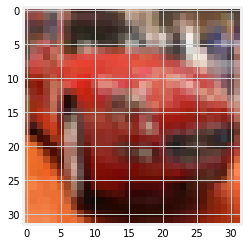

In [7]:
#printing image
img = plt.imshow(img_train[index])

In [8]:
#checking label_index
print(l_train[index][0])

1


In [9]:
#creating label array
labels = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
#checking label_name
print(labels[l_train[index][0]])

automobile


In [11]:
 #converting label matrices to binary arrays forms
l_test_bin = to_categorical(l_test)
l_train_bin = to_categorical(l_train)

In [12]:
print(l_train_bin)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
#normalizing the image pixels to value between 0 and 1
img_train = img_train / 255
img_test = img_test / 255

In [ ]:
print(img_train[index])

In [21]:
#creating my model
model = Sequential();

#adding first layer i.e convolutional layer, passing input_shape only in first layer
model.add(Conv2D(32, (5 , 5), activation="relu", input_shape=(32, 32, 3)))

#adding a pooling layer
model.add(MaxPooling2D(pool_size = (2 , 2)))

#adding another convolutional layer
model.add(Conv2D(32, (5 , 5), activation="relu"))

#adding another pooling layer
model.add(MaxPooling2D(pool_size = (2 , 2)))

#adding flatteing layer i.e. fully connected layer
model.add(Flatten())

#Embedding nuerons using dense layer
model.add(Dense(1000, activation="relu"))

#Adding a dropout with 50% droupout rate
model.add(Dropout(0.5))

#Embedding nuerons using dense layer
model.add(Dense(500, activation="relu"))

#Adding a dropout with 50% droupout rate
model.add(Dropout(0.5))

#Embedding nuerons using dense layer
model.add(Dense(250, activation="relu"))

#Embedding nuerons using dense layer
model.add(Dense(10, activation="softmax"))

In [26]:
#compiling the model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [27]:
#training the model
train = model.fit(img_train, l_train_bin, batch_size = 256, epochs = 10 , validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 55s 350ms/step - loss: 1.8026 - accuracy: 0.3288 - val_loss: 1.4934 - val_accuracy: 0.4534
Epoch 2/10
157/157 [==============================] - 54s 347ms/step - loss: 1.4488 - accuracy: 0.4705 - val_loss: 1.4386 - val_accuracy: 0.4794
Epoch 3/10
157/157 [==============================] - 55s 348ms/step - loss: 1.3217 - accuracy: 0.5192 - val_loss: 1.2406 - val_accuracy: 0.5553
Epoch 4/10
157/157 [==============================] - 55s 348ms/step - loss: 1.2133 - accuracy: 0.5627 - val_loss: 1.2080 - val_accuracy: 0.5667
Epoch 5/10
157/157 [==============================] - 55s 349ms/step - loss: 1.1500 - accuracy: 0.5901 - val_loss: 1.1485 - val_accuracy: 0.5984
Epoch 6/10
157/157 [==============================] - 55s 349ms/step - loss: 1.0740 - accuracy: 0.6187 - val_loss: 1.0500 - val_accuracy: 0.6333
Epoch 7/10
157/157 [==============================] - 55s 348ms/step - loss: 1.0079 - accuracy: 0.6449 - val_loss: 1.0466 - val_ac

In [66]:
#evaluating the model
model.evaluate(img_test, l_test_bin)[1]

313/313 [==============================] - 5s 16ms/step - loss: 1.0009 - accuracy: 0.6534


0.6534000039100647

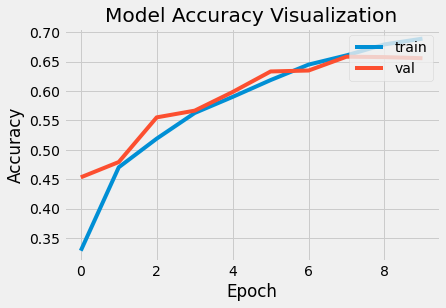

In [34]:
#plotting the model accuracy
plt.plot(train.history["accuracy"])
plt.plot(train.history["val_accuracy"])
plt.title("Model Accuracy Visualization")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train', 'val'], loc="upper right")
plt.show()

In [67]:
#uploading a file for testing
from google.colab import files
uploaded = files.upload()

Saving a1.jpg to a1.jpg


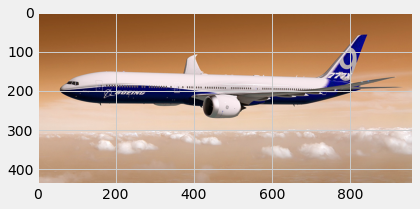

In [68]:
#outputing the uploaded image
import cv2
uploaded_img = cv2.imread('a1.jpg')
img = plt.imshow(uploaded_img)

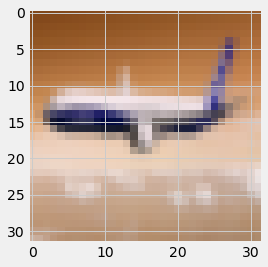

In [69]:
#resizing the uploaded image
from skimage.transform import resize
resized_img = resize(uploaded_img, (32 , 32 , 3))
img = plt.imshow(resized_img)

In [71]:
#getting the prediction for uploaded image
prediction = model.predict(np.array([resized_img]))
print(prediction)
max_value = np.amax(prediction)
max_value = max_value * 100
print(max_value)
max_index = np.argmax(prediction)
print(labels[max_index])


[[9.4852221e-01 1.1049818e-03 1.9684391e-02 3.4652179e-04 3.3259683e-03
  1.9825775e-05 7.2781979e-05 2.1530015e-05 2.5744401e-02 1.1574031e-03]]
94.85222101211548
aeroplane
